# Probability
## Random number generators
In this assignment we will practice generating samples from various discrete random variables. All distributions that we generate are well-known and already implemented in Python. However, it is important to understand how random variables work and how we can implement random number generators with different distributions.

### Peer review grading
After you finish solving problems, you can click *Validate* button to check that everything works. Then you can submit it for automatic grading. However, automatic grading (as well as validation) only checks that all functions are implemented and there are no syntax errors. It cannot check that results are correct in this assignment. The main part of grading is done in peer review mode. When ready, please, download this notebook as ipynb file (*File → Download as → Notebook*), then submit to *Peer Review: Random number generators* course element. Please, refer to [this article](https://learner.coursera.help/hc/en-us/articles/360042817371-Solving-Common-Issues-with-Coursera-Labs-) for help with the Lab environment. Peer Review Grading instructions are given in the appropriate places in the notebook below (under **Peer Review Grading** headings).


### Binomial random number generator: modelling probability space
Implement the function `rbinom_fair(trials)` that generates one random number with binomial distribution for a given number of trials (tossings). Assume that we use fair coin (i.e. probability of success (*head*) is 1/2). Use `itertools.product` to construct a sample set `omega`. Then define a function `X(outcome)` that takes element `outcome` from `omega` and returns the value of your random variable for this outcome (i.e. counts number of *heads*). Then use `random.choice` to select random outcome from `omega` (note that `random.choice` and `numpy.random.choice` are different functions; you should use `random.choice` here because `numpy.random.choice` does not work with lists of tuples), calculate the value of `X` at this element and return it. The results of your function should be similar to the results of `scipy.stats.binom(trials, 0.5).rvs()`. You can test your function by generating large samples and plotting frequencies like discussed in the video.

**Note.** This way of generating binomial random variable is extremely inefficient due to large sample space for large values of `trials`. In the next problem we discuss mode efficient way to do it. This example is for educational purposes only: it illustrates the definition of random variable as a function defined on probability space.

In [378]:
import random
import matplotlib.pyplot as plt
from itertools import product
import scipy
from scipy import stats
from scipy.stats import binom

def rbinom_fair(trials):
    # your code here
    sample_space = {'Heads', 'Tails'}
    
    # construct a sample set omega
    omega = list(product(['H', 'T'], repeat=trials))
    # print(len(omega), 2**trials)
    
    # define a function X(outcome) that takes element outcome from omega 
    # and returns the value of your random variable for this outcome
    # (i.e. counts number of heads)
    def X(outcome):
        return outcome.count('H') 
    
    # use random.choice to select random outcome from omega
    random_choice = random.choice(omega) 
    
    # calculate the value of X at this element and return it    
    return X(random_choice)
    

Try running it. Should obtain random number. If you run this cell again, you will get different number.

In [379]:
print(rbinom_fair(10))

7


We will use functions that were implemented in the videos to draw barplots of empirical frequencies and compare them with the corresponding probability mass functions.

In [380]:
# two functions from videos
def count_frequencies(data, relative=False):
    counter = {}
    for element in data:
        if element not in counter:
            counter[element] = 1
        else:
            counter[element] += 1
    if relative:
        for element in counter:
            counter[element] /= len(data)
    return counter
    
def sample_bar_plot(data, ax=None):
    if ax is None:
        ax = plt.gca()
    freqs = count_frequencies(data, relative=True)
    ax.bar(freqs.keys(), freqs.values())
    ax.set_xticks(list(freqs.keys()))
    return ax

Let us first generate a sample from `scipy.stats.binom` and visualize it.

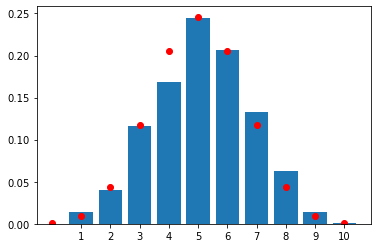

In [381]:
from scipy.stats import binom

trials = 10
size = 1000

sample = [binom(trials, 0.5).rvs() for _ in range(size)]

sample_bar_plot(sample)
plt.plot(range(trials + 1), binom(trials, 0.5).pmf(range(trials + 1)), 'o', color='red')

If we would use `rbinom_fair` instead of `binom(trials, 0.5).rvs()` in the code above, we had to obtain a similar result. Let us write a test function to compare results of our implementation and reference one.

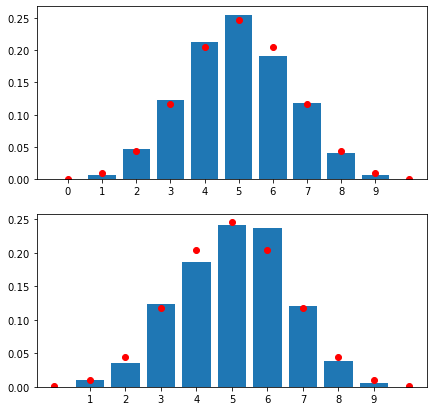

In [382]:
def two_pictures_rbinom_fair(trials, size):
    plt.figure(figsize=(7, 7))
    plt.subplot(211)
    
    sample = [binom(trials, 0.5).rvs() for _ in range(size)]

    sample_bar_plot(sample)
    plt.plot(range(trials + 1), binom(trials, 0.5).pmf(range(trials + 1)), 'o', color='red')
    
    plt.subplot(212)
    try:
        sample = [rbinom_fair(trials) for _ in range(size)]
        sample_bar_plot(sample)
        plt.plot(range(trials + 1), binom(trials, 0.5).pmf(range(trials + 1)), 'o', color='red')
    except (NameError, TypeError) as e:
        raise Error("Function rbinom_fair is not yet implemented")
        
two_pictures_rbinom_fair(10, 1000)

**Peer Review Grading.** Investigate pictures above: bottom one should be present and should be similar to top one. Points should be close to the top side of rectangles. Slight difference is possible due to randomness (try running the cell several times).

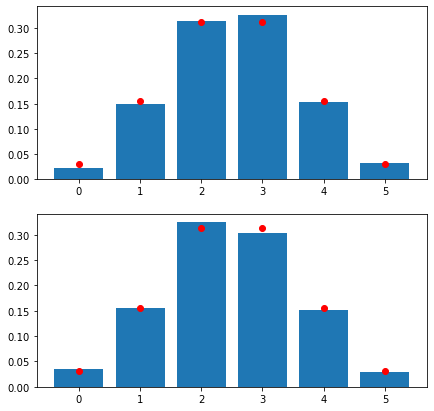

In [383]:
two_pictures_rbinom_fair(5, 1000)

**Grading.** Investigate the pictures above: bottom one should be present and should be similar to the top one. (Slight difference is possible due to randomness: we have only 1000 samples here.)

### Binomial random number generator: explicit formula
Use `numpy.random.choice` to implement function `rbinom(trials, prob, size)` that samples binomially distributed random variable with given number of trials (*tosses*) and probability of success (*head*) and returns a sample of size `size`. You should pass an array that contains all possible values that this random variable can take as a first argument of `numpy.random.choice` and their respective probabilities (i.e. values of probability mass function) as a second argument. To find probabilities, you can use the formula that is discussed in videos. You can use `scipy.special.comb` to find binomial coefficients. The results of your function should be similar to the results of `scipy.stats.binom(trials, prob).rvs(size)`. You can test your function by generating large samples and plotting frequencies like discussed in the video.

In [365]:
from numpy.random import choice
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom


def rbinom(trials, prob, size):
    # your code here

    sample_space = {'Heads', 'Tails'}
    
    # construct a sample set omega
    omega = list(product(['H', 'T'], repeat=trials))
    
    # count the heads in each element (remove duplicates using set())
    heads_list = list(set([el.count('H') for el in omega]))
    
    # calculate the probabilities using comb()
    probabilities = [comb(trials, head) * (prob ** head) * (1 - prob) ** (trials - head) for head in heads_list]
    # print(sum(probabilities))

    
    # get a sample 
    sample = choice(heads_list, size=size, p=probabilities)
    
    return sample

In [366]:
rbinom(10, 0.3, 5) # expecting something like `array([4, 1, 3, 2, 1])`

array([3, 3, 3, 5, 1])

Try running it: should obtain `array` of numbers.

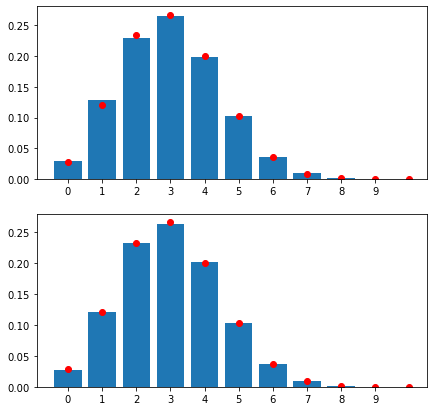

In [367]:
def two_pictures_rbinom(trials, prob, size):
    def draw_sample(sample, trials, prob):
        sample_bar_plot(sample)
        plt.plot(range(trials + 1), binom(trials, prob).pmf(range(trials + 1)), 'o', color='red')
    plt.figure(figsize=(7, 7))
    plt.subplot(211)
    draw_sample(binom(trials, prob).rvs(size), trials, prob)
    plt.subplot(212)
    try:
        draw_sample(rbinom(trials, prob, size), trials, prob)
    except (NameError, TypeError):
        raise Exception("rbinom is not implemented or other error occurred")

two_pictures_rbinom(10, 0.3, 10000)

**Peer Review Grading.** Investigate pictures above: bottom one should be present and should be similar to top one.

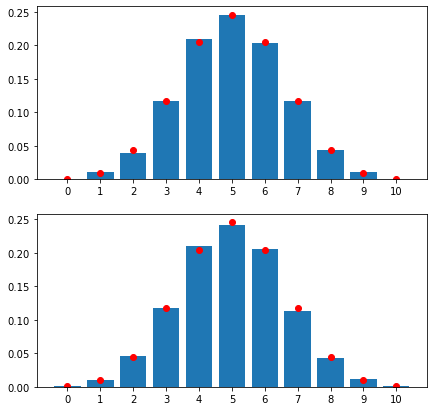

In [368]:
two_pictures_rbinom(10, 0.5, 10000)

**Peer Review Grading.** Investigate the pictures above: the bottom one should be present and should be similar to the top one.

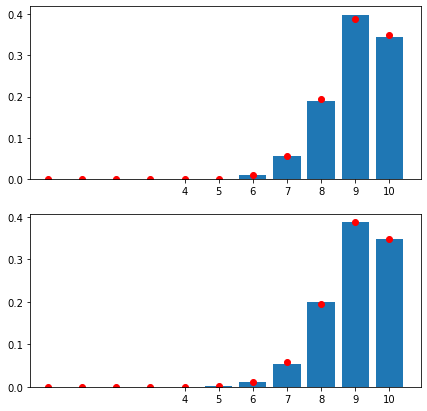

In [369]:
two_pictures_rbinom(10, 0.9, 10000)

**Peer Review Grading.** Investigate the pictures above: the bottom one should be present and should be similar to the top one.

### Binomial random number generator: sum of Bernoulli random variables
Finally, consider another way to generate binomial random variables. Consider Bernoulli random variable. It takes value 1 with probability $p$ and value 0 with probability $1-p$. Assume that $X_1, \ldots, X_n$ are independent Bernoulli random variables. They can be considered as realizations of independent coin tossings (if coin lands *head*, we write 1, otherwise write 0; probability of *head* is $p$). Then $Y=X_1 + \ldots + X_n$ is a binomial random variable with $n$ trials and probability of success $p$. Let us use this approach to generate binomial random variable.

Write a function `rbinom_with_bernoulli(trials, prob)` that generates `trials` independent Bernoulli random variables with parameter $p=prob$ and returns its sum. To generate Bernoulli random variable, use the `numpy.random.choice` function. Independent runs of this function will generate independent Bernoulli random variables.

In [370]:
# your code here

def rbinom_with_bernoulli(trials, prob):
    
    # construct a sample set omega
    # all cases with flipping a coin
    omega = list(product(['H', 'T'], repeat=trials))
    
    # count heads (remove duplicates using set()) we get Yi
    # H = 1
    # T = 0
    # 𝑌 = 𝑋1 + … + 𝑋𝑛
    # el.count('H') is equal sum of H (1) and tails (0)
    heads_list = list(set([el.count('H') for el in omega]))
    
    # calculate corresponding probability 
    probabilities = [comb(trials, head) * prob ** head * (1 - prob)**(trials - head) for head in heads_list]
    
    # get a sample
    Y = choice(heads_list, p = probabilities)

    return Y


In [371]:
rbinom_with_bernoulli(10, 0.3)

3

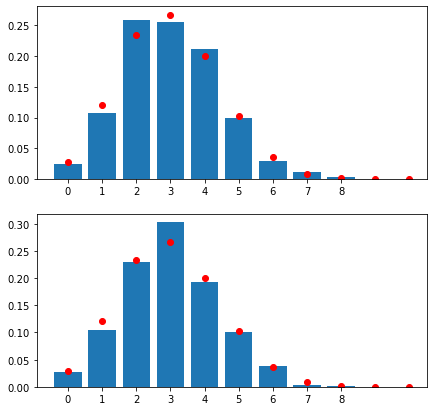

In [372]:
def two_pictures_rbinom_with_bernoulli(trials, prob, size):
    def draw_sample(sample, trials, prob):
        sample_bar_plot(sample)
        plt.plot(range(trials + 1), binom(trials, prob).pmf(range(trials + 1)), 'o', color='red')
    plt.figure(figsize=(7, 7))
    plt.subplot(211)
    draw_sample(binom(trials, prob).rvs(size), trials, prob)
    plt.subplot(212)
    try:
        draw_sample([rbinom_with_bernoulli(trials, prob) for _ in range(size)], trials, prob)
    except (NameError, TypeError):
        raise Exception("rbinom_with_bernoulli is not implemented or other error occurred")

two_pictures_rbinom_with_bernoulli(10, 0.3, 1000)

**Peer Review Grading.** Investigate the pictures above: the bottom one should be present and should be similar to the top one.

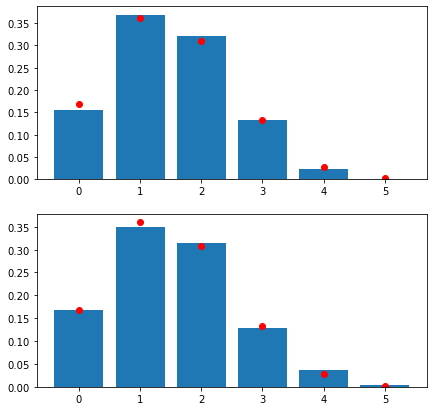

In [373]:
two_pictures_rbinom_with_bernoulli(5, 0.3, 1000)

**Peer Review Grading.** Investigate the pictures above: the bottom one should be present and should be similar to the top one.

### Geometric random number generator
Implement a function `rgeom(p)` that generates one geometrically distributed random variable with probability of success `p`. Instead of using explicit formula for the probability, use the definition of geometric distribution: toss a virtual coin until first *head* appears, then return number of tosses (including the one with *head*). You can model this coin using `numpy.random.choice` function with appropriate `p` parameter. Check that results are similar to ones generated with `scipy.stats.geom(p).rvs()`.

In [374]:
from scipy.stats import geom

# your code here

def rgeom(p):
    
    # set 0 at the start
    random_variable = 0
    
    # run cycle
    while True:
        
        # increase the value
        random_variable += 1
        
        # get a choice value
        x = choice(['H', 'T'],  p = [p, 1 - p])
        
        # stop if it is not head
        if x != 'T':
            break
            
    return random_variable


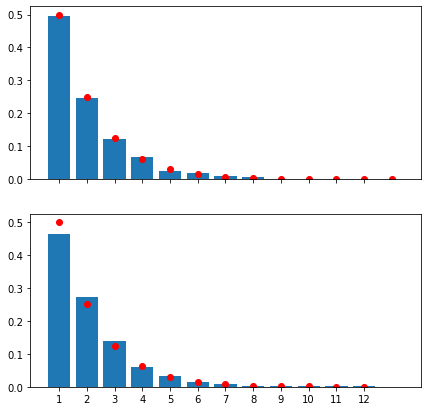

In [375]:
def two_pictures_rgeom(p, size):
    def draw_sample(sample, p, ax):
        sample_bar_plot(sample, ax)
        x = range(1, max(sample) + 1)
        ax.plot(x, geom(p).pmf(x), 'o', color='red')
    _, axes = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
    draw_sample([geom(p).rvs() for _ in range(size)], p, axes[0])
    try:
        draw_sample([rgeom(p) for _ in range(size)], p, axes[1])
    except (NameError, TypeError):
        raise Exception("rbinom_with_bernoulli is not implemented or other error occurred")
two_pictures_rgeom(0.5, 1000)

**Peer Review Grading.** Investigate the pictures above: the bottom one should be present and should be similar to the top one.

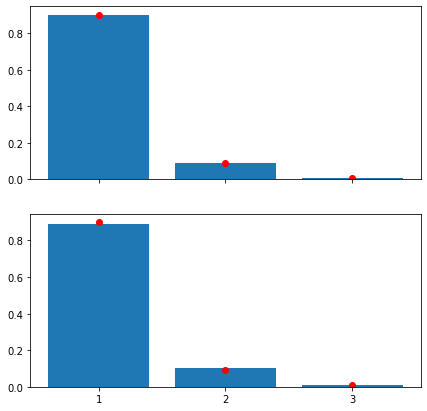

In [376]:
two_pictures_rgeom(0.9, 1000)

**Peer Review Grading.** Investigate the pictures above: the bottom one should be present and should be similar to the top one.

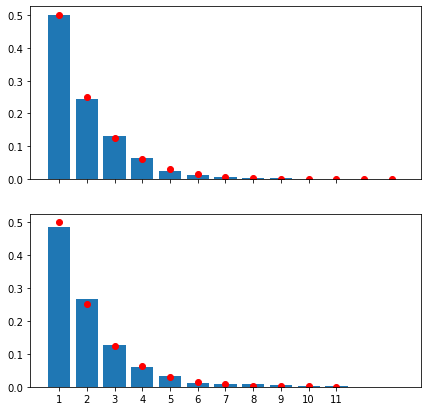

In [377]:
two_pictures_rgeom(0.5, 1000)

**Peer Review Grading.** Investigate the pictures above: the bottom one should be present and should be similar to the top one.

## That's all
Now you know that there are different ways to construct random variables with given distributions.